# Proyek Analisis Data: Nama dataset
- Nama: Yeremia Yosefan Pane    
- Email: yeremiayosefanpane@hotmail.com
- Id Dicoding:

## Menentukan Pertanyaan Bisnis

- pertanyaan 1
- pertanyaan 2

## Menyaipkan semua library yang dibuthkan

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [7]:
df_day = pd.read_csv('./Datasets/day.csv')
df_hour = pd.read_csv('./Datasets/hour.csv')

In [8]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

### Menampilkan informasi dari dataset

In [10]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [11]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Melakukan pengecekan missing value pada data set

In [12]:
df_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
df_hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Mengubah tipe dataset kedalam bentuk yang benar

In [14]:
df_day["dteday"] = pd.to_datetime(df_day["dteday"])
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])

### Melakukan pengecekan terhadap data duplicate

In [15]:
print(df_day.duplicated().sum())
print(df_hour.duplicated().sum())

0
0


### Pembersihan data outliers dengan menggunakan imputation

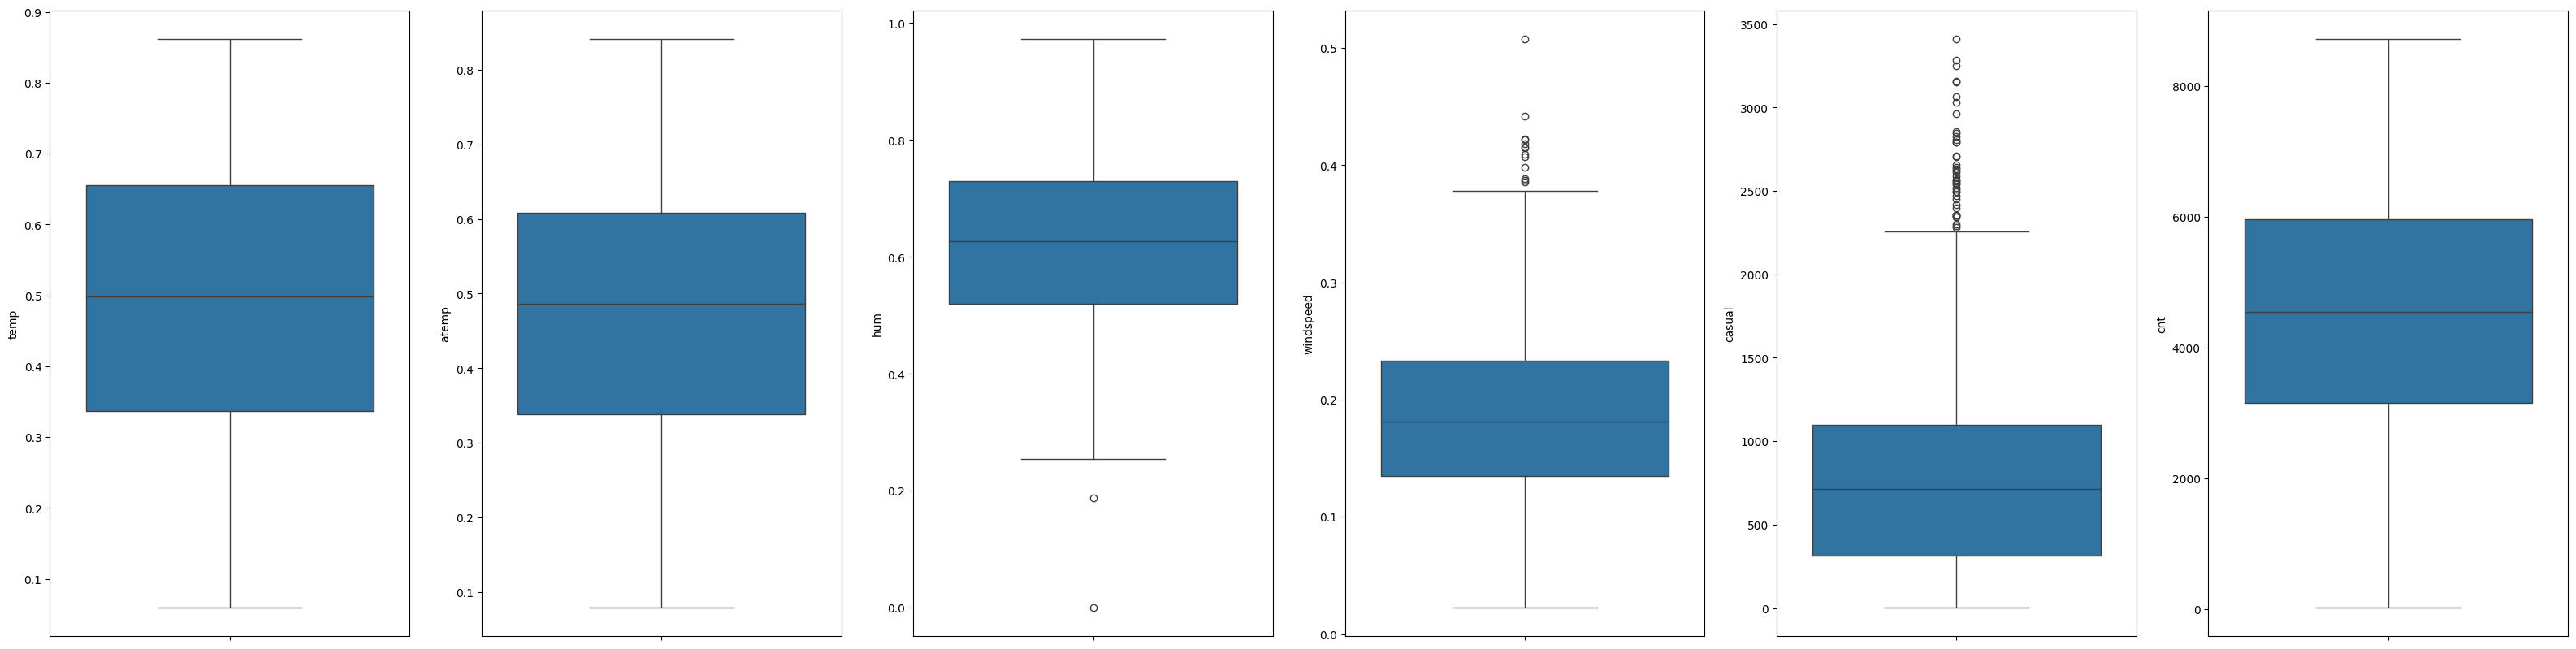

In [20]:
ft_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual','cnt']
plt.rcParams["figure.figsize"]= (40,10)

i = 1
for col in ft_cols:
    plt.subplot(1,len(ft_cols),i)
    sns.boxplot(y=col, data=df_day)
    i+=1
plt.savefig("Boxplot untuk beberapa variabel")

In [25]:
# Convert columns to numeric if needed
df_day['windspeed'] = pd.to_numeric(df_day['windspeed'], errors='coerce')
df_day['casual'] = pd.to_numeric(df_day['casual'], errors='coerce')
df_day['hum'] = pd.to_numeric(df_day['hum'], errors='coerce')

otl_col = ['windspeed', 'casual', 'hum']
for i in otl_col:
    Q1 = df_day[i].quantile(0.25)
    Q3 = df_day[i].quantile(0.75)
    IQR = Q3 - Q1
    maximum = Q3 + (1.5 * IQR)
    minimum = Q1 - (1.5 * IQR)
    kondisi_lower_than = df_day[i] < minimum
    kondisi_more_than = df_day[i] > maximum
    df_day[i] = df_day[i].mask(cond=kondisi_more_than, other=maximum)
    df_day[i] = df_day[i].mask(cond=kondisi_lower_than, other=minimum)


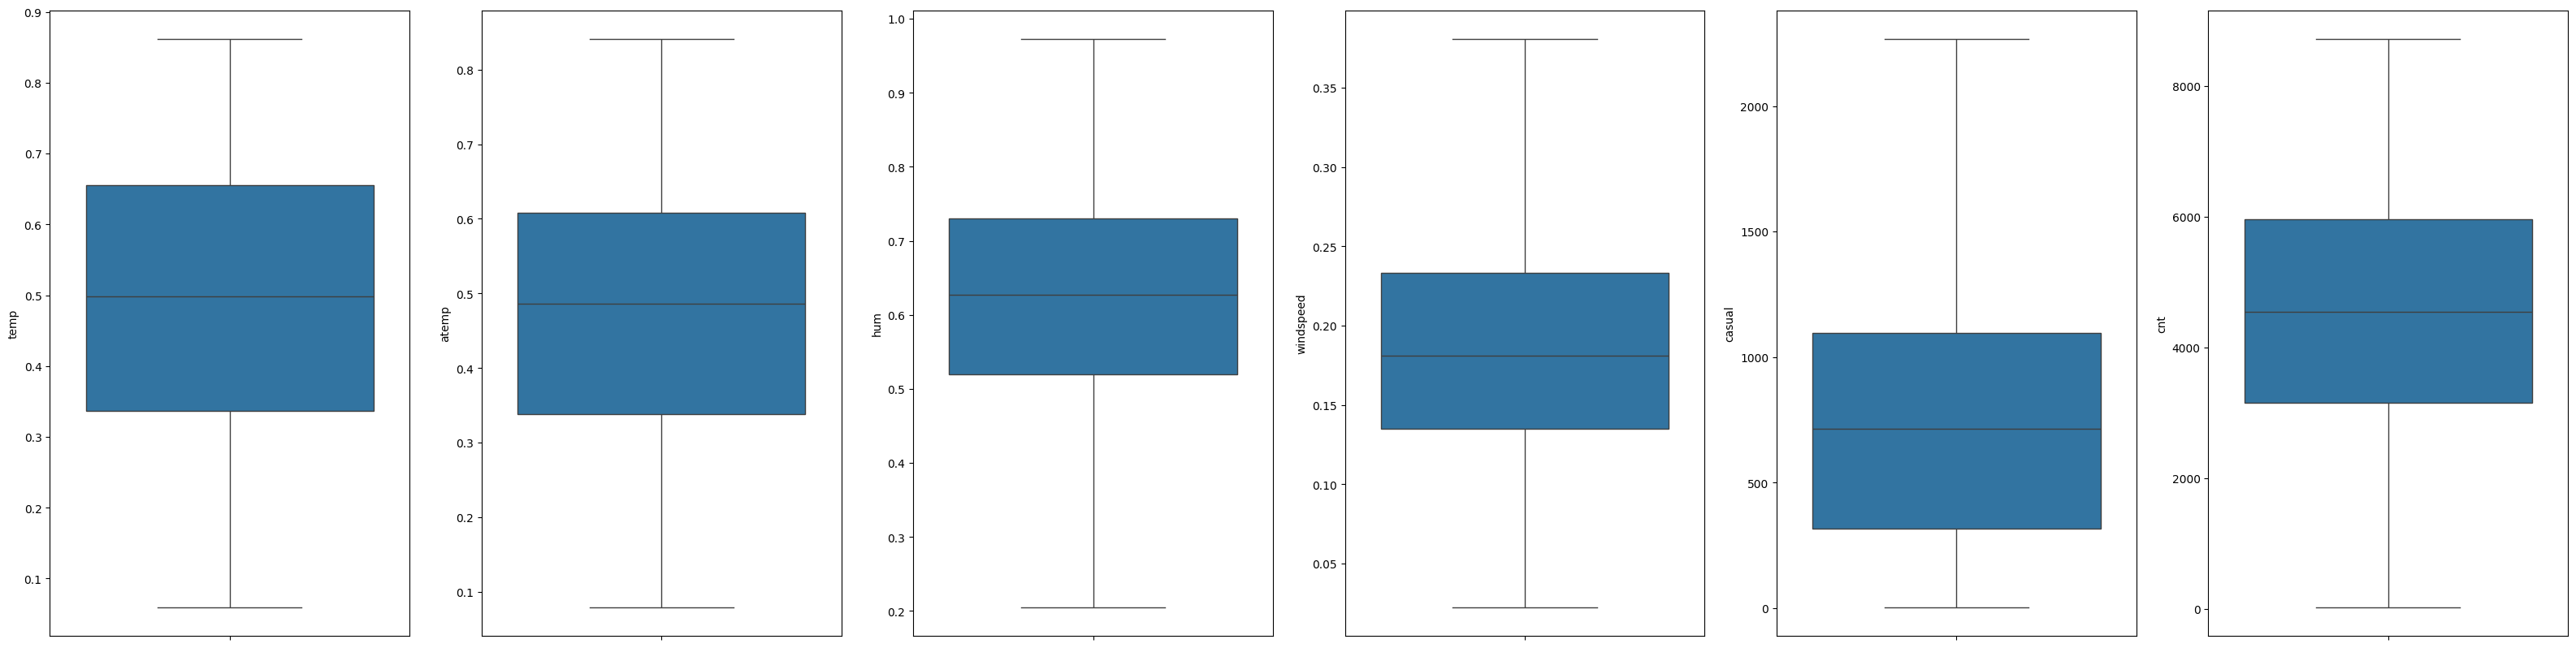

In [26]:
ft_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual','cnt']
plt.rcParams["figure.figsize"]= (40,10)

i = 1
for col in ft_cols:
    plt.subplot(1,len(ft_cols),i)
    sns.boxplot(y=col, data=df_day)
    i+=1
plt.savefig("Boxplot untuk beberapa variabel")

### Cleaning Data

## Exploratory Data Analysis (EDA)

### Explore ...

## Visualization & Explanatory Analysis

### Pertanyaan 1: 

### Pertanyaan 2: 

## Conclusion

- Conclution pertanyaan 1
- conclution pertanyaan 2